In [2]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable


In [5]:
# 数据
train_set=mnist.MNIST("./data",train=True,download=True)
test_set=mnist.MNIST("./data",train=False,download=True)

In [6]:

a_data,a_label=train_set[0]
a_data

In [7]:
a_label

5

In [8]:
# 读入的数据是PIL 库中的格式，可以方便地转为numpy array
a_data=np.array(a_data,dtype="float32")
print(a_data.shape)

(28, 28)


In [9]:
print(a_data)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [10]:
# 第一层输入的是28*28 =784，所以必须将得到的数据做一个变换，使用reshape 将他们拉平为一个一维向量

def data_tf(x):
    x=np.array(x,dtype="float32")/255
    x=(x-0.5)/0.5 # 标准化 
    x=x.reshape((-1,)) # 拉平
    x=torch.from_numpy(x)
    return x



In [11]:
# 重新载入数据集，申明定义的数据变换
train_set=mnist.MNIST("./data",train=True,transform=data_tf,download=True)
test_set=mnist.MNIST("./data",train=False,transform=data_tf,download=True)

In [12]:
a,a_label=train_set[0]
print(a.shape)
print(a_label)

torch.Size([784])
5


In [13]:
# 使用DataLoader 定义一个数据迭代器
from torch.utils.data import DataLoader
train_data=DataLoader(train_set,batch_size=64,shuffle=True)
test_data=DataLoader(test_set,batch_size=128,shuffle=True)
                     

In [14]:
a,a_label=next(iter(train_data))

In [15]:
print(a.shape)
print(a_label.shape)

torch.Size([64, 784])
torch.Size([64])


In [16]:
net=nn.Sequential(
    nn.Linear(784,400),
    nn.ReLU(),
    nn.Linear(400,200),
    nn.ReLU(),
     nn.Linear(200,100),
    nn.ReLU(),
    nn.Linear(100,10),

)

In [17]:
net

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

In [18]:
#交叉熵
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),1e-1) # 使用随机梯度下降 学习率0.1

In [19]:
# 训练开始
losses=[]
acces=[]
eval_losses=[]
eval_acces=[]
for e in range(20):
    train_loss=0
    train_acc=0
    net.train()
    for im ,label in train_data:
        im =Variable(im)
        label=Variable(label)
        # 前向传播
        out=net(im)
        loss=criterion(out,label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss+=loss.data.numpy()
        # 计算分类的准确性
        _,pred=out.max(1)
        num_correct=(pred==label).sum().data.numpy()
        acc=num_correct/im.shape
        train_acc +=acc
    losses.append(train_loss/len(train_data))
    acces.append(train_acc/len(train_data))
    # 在测试集上检验效果
    eval_loss=0
    eval_acc=0
    net.eval() # 将模型改为预测模式
    for im,label in test_data:
        im=Variable(im)
        label=Variable(label)
        out=net(im)
        loss=criterion(out,label)
        # 记录误差
        eval_loss +=loss.data.numpy()
        # 记录准确率
        _,pred=out.max(1)
        num_correct=(pred==label).sum().data.numpy()
        acc=num_correct/im.shape[0]
        eval_acc +=acc
    eval_losses.append(eval_loss/len(test_data))
    eval_acces.append(eval_acc/len(test_data))
    print(str(e),train_loss/len(train_data),train_acc/len(train_data),
                  eval_loss/len(test_data),eval_acc/len(test_data))
        

0 0.5213029154780895 [0.83428838 0.06806302] 0.1912919298946103 0.9385878164556962
1 0.16373938308564076 [0.94974347 0.07748928] 0.14092725953912433 0.9551028481012658
2 0.11779855117837248 [0.9628698  0.07855946] 0.1144479812606226 0.9642998417721519
3 0.08831873142928966 [0.97251466 0.07934816] 0.1211251780107806 0.9607397151898734
4 0.07415082271117518 [0.97669576 0.07968675] 0.08730743165257611 0.9724090189873418
5 0.06187877081819117 [0.98022721 0.07997503] 0.09537540911402129 0.9710245253164557
6 0.05238704615111735 [0.98317564 0.08021572] 0.1184820476212079 0.9631131329113924
7 0.043968981779269826 [0.9861907  0.08046185] 0.0669279315190602 0.9798259493670886
8 0.03920904246133083 [0.98717351 0.08054208] 0.07562001655467704 0.9763647151898734
9 0.03310149394349058 [0.98947228 0.08073381] 0.13605637796506098 0.9615308544303798
10 0.029004116483064477 [0.99030517 0.08079772] 0.061689145367922665 0.9811115506329114
11 0.026555808662160882 [0.99135461 0.08088339] 0.06461215903393075

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

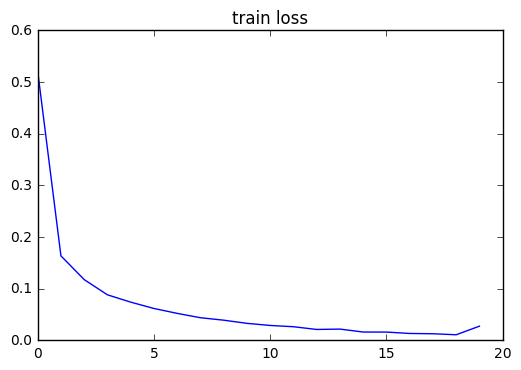

In [21]:
plt.title("train loss")
plt.plot(np.arange(len(losses)),losses)

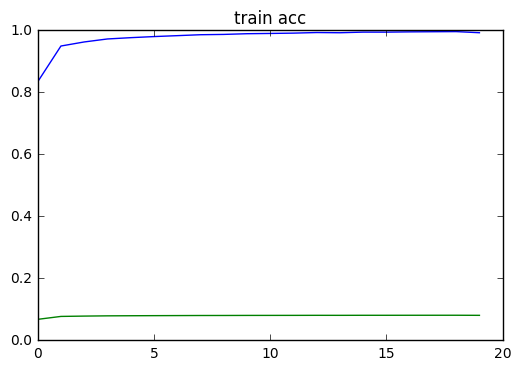

In [23]:
plt.title("train acc")
plt.plot(np.arange(len(acces)),acces)

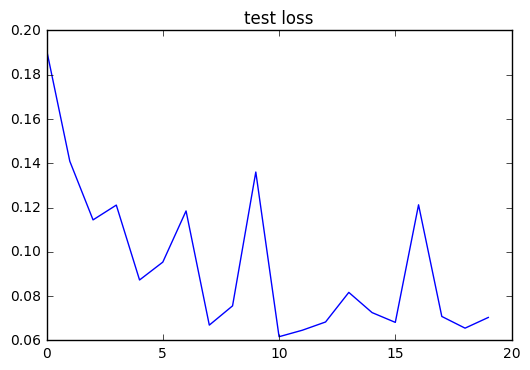

In [24]:
plt.title("test loss")
plt.plot(np.arange(len(eval_losses)),eval_losses)

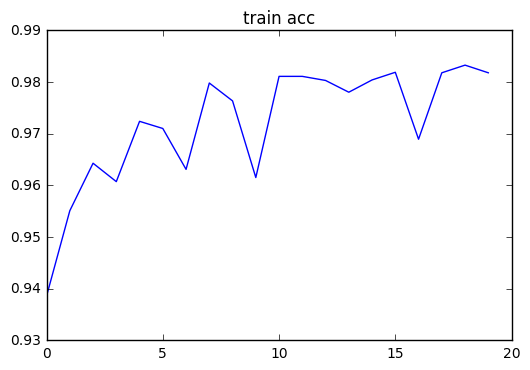

In [25]:
plt.title("train acc")
plt.plot(np.arange(len(eval_acces)),eval_acces)